pip install tensorflow

In [15]:
import os
import sys
sys.path.append("../../..")
# openCV
import cv2
# numpy
import numpy as np
# matplotlib
import matplotlib.pyplot as plt
# class util functions
from utils.imutils import jimshow as show
from utils.imutils import jimshow_channel as show_channel
import utils.classifier_utils as clf_util

# Import sklearn metrics
from sklearn import metrics
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# cifar10 dataset
from tensorflow.keras.datasets import cifar10

In [2]:
# loading the cifar10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

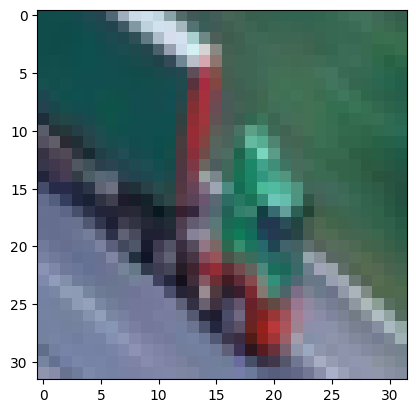

array([9], dtype=uint8)

In [3]:
plt.imshow(X_train[50])
plt.show()
y_train[50]

In [ ]:
# define labels
classes = [dog, frog, cat]
classes

question: should we preprocess the testing data?

In [8]:
X_train_list=[]
X_test_list=[]

for image in X_test: # preprocessing the testing images
    gray_test = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert to grayscale
    normalized = gray_test/255 # normalize
    X_test_list.append(normalized) # add to list
X_preprocess_test_array = np.array(X_test_list) # turn list back into an array
# reshape
X_preprocess_test = X_preprocess_test_array.reshape(-1, 1024)

for image in X_train: # preprocessing the training images
    gray_train = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert to grayscale
    normalized = gray_train/255 # normalize
    X_train_list.append(normalized) # add to list
X_preprocess_train_array = np.array(X_train_list) # turn list back into an array
# reshape
X_preprocess_train = X_preprocess_train_array.reshape(-1, 1024)

X_preprocess_train.shape
X_preprocess_test.shape

(10000, 1024)

In [ ]:
# View an image
# plt.imshow(X_preprocess_train[0])
# plt.show()

In [5]:
# making a logistic regression classifier
clf = LogisticRegression(tol=0.1, 
                         solver='saga',
                         multi_class='multinomial').fit(X_preprocess_train, y_train)

/home/ucloud/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#classes = sorted(set(y_train))

In [9]:
# testing accuracy and making a classification report for the logistic regression classifier
y_pred = clf.predict(X_preprocess_test)
cm = metrics.classification_report(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.34      0.39      0.36      1000
           1       0.36      0.40      0.38      1000
           2       0.26      0.22      0.24      1000
           3       0.22      0.16      0.19      1000
           4       0.25      0.23      0.24      1000
           5       0.34      0.27      0.30      1000
           6       0.28      0.31      0.29      1000
           7       0.32      0.32      0.32      1000
           8       0.33      0.40      0.36      1000
           9       0.39      0.44      0.41      1000

    accuracy                           0.31     10000
   macro avg       0.31      0.31      0.31     10000
weighted avg       0.31      0.31      0.31     10000



In [13]:
# try and predict the class of a data point
clf_util.plot_individual(X_preprocess_train, 
                         y_test, 
                         50)

ValueError: cannot reshape array of size 1024 into shape (28,28)

In [16]:
# neural network classifier

#create the classifier
classifier = MLPClassifier(activation = "logistic",
                            hidden_layer_sizes = (10,), # 20 neurons in our hidden layer
                            max_iter=500, # 1000 epochs
                            random_state = 42) # random state for reproducibility

# fit the classifier to the data
classifier.fit(X_preprocess_train, y_train)

# get predictions
y_pred = classifier.predict(X_preprocess_test)

# use confusion matrix to check performance
metrics.ConfusionMatrixDisplay.from_estimator(classifier,           # the classifier name
                                            X_preprocess_train,     # the training features
                                            y_train,                # the training labels
                                            cmap=plt.cm.Blues,      # make the colours prettier
                                            labels=["FAKE", "REAL"])# the labels in the data arranged alphabetically

# get classification report
classifier_metrics = metrics.classification_report(y_test, y_pred)
print(classifier_metrics)

# saving classification report as a .txt file
text_file = open(r'../output/MLP_classification_report.txt', 'w')
text_file.write(classifier_metrics)
text_file.close()

# plotting loss curves. should ideally have a smooth, steep downwards slope which ends in a plateau
plt.plot(classifier.loss_curve_)
plt.title("Loss curve during training", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss score')
plt.show()

/home/ucloud/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ucloud/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


ValueError: At least one label specified must be in y_true